In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial'


In [3]:
df = pd.read_csv("../data/black-sea/metagenomics/black-sea-metadata.csv",index_col=0)

In [4]:
# load MO pterin gene families
mwpterins = pd.read_csv("../data/pyranopterin.geneTable.csv")

mo_ko = mwpterins[mwpterins['Pterin'].apply(lambda x: 'Mo' in str(x))]['KO (pterin domain)'].dropna().unique().tolist()
w_ko = mwpterins[mwpterins['Pterin'].apply(lambda x: 'W' in str(x))]['KO (pterin domain)'].dropna().unique().tolist()


pterin_kos = mwpterins["KO (pterin domain)"].dropna().unique().tolist()
pterin_kos = [x.split(",") for x in pterin_kos]
pterin_kos = list(set([item for sublist in pterin_kos for item in sublist]))


mo_ko = [x.split(",") for x in mo_ko]
mo_ko = list(set([item for sublist in mo_ko for item in sublist]))


w_ko = [x.split(",") for x in w_ko]
w_ko = list(set([item for sublist in w_ko for item in sublist]))


In [5]:
KO = pd.read_csv("../data/black-sea/metagenomics/blackSeaMAG.keggOrthogroupCopyNumbers.csv",index_col=0).T.fillna(0)
KO["total"] = KO.sum(axis=1)
KO["c_W"] = KO[[x for x in list(KO) if x in w_ko]].sum(axis=1)
KO["c_Mo"] = KO[[x for x in list(KO) if x in mo_ko]].sum(axis=1)
rel_abun = pd.read_csv("../data/black-sea/metagenomics/blackSea.MAGfraction.04Feb2023.csv",index_col=0)

In [6]:
df_all = KO.join(rel_abun)
C = df_all[["c_W","c_Mo"]].values
X = df_all[list(rel_abun)].T.values
ko_abundances = pd.DataFrame(np.dot(X,C),columns=["c_W","c_Mo"],index = list(rel_abun))

Text(0, 0.5, 'depth (m)')

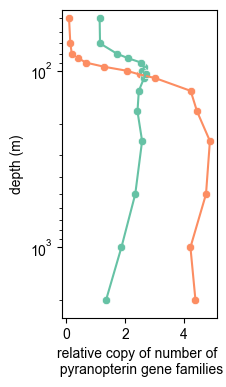

In [9]:
#df["c_W"] = df[[x for x in list(df) if x in w_ko]].sum(axis=1)
#df["c_Mo"] = df[[x for x in list(df) if x in mo_ko]].sum(axis=1)
dfp = df[["depth_m"]].join(ko_abundances)

cmap = sns.color_palette("Set2")

plt.figure(figsize=(2,4))

#gene = "K05772"
#gene = "K05773"
#gene = "K06857"
gene = "c_W"
sns.scatterplot(x=gene,data=dfp,y="depth_m",color=cmap[1])
plt.plot(dfp.sort_values("depth_m")[gene],dfp.sort_values("depth_m")["depth_m"],color=cmap[1])

gene = "c_Mo"

sns.scatterplot(x=gene,data=dfp,y="depth_m",color=cmap[0])
plt.plot(dfp.sort_values("depth_m")[gene],dfp.sort_values("depth_m")["depth_m"],color=cmap[0])


plt.xlabel("relative copy of number of \n pyranopterin gene families")




plt.ylim([45,2500])

plt.gca().invert_yaxis()

plt.yscale("log")
#plt.ylabel("dissolved oxygen (mmol / kg)")
#plt.label("depth (m)")
plt.ylabel("depth (m)")


In [50]:
df["depth_m"].min()

50

Text(0, 0.5, 'depth (m)')

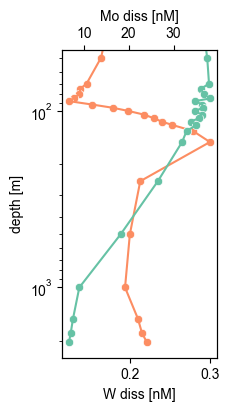

In [11]:
# load the data for the W and Mo measuremnts
geochem_data = pd.read_csv("../data/black-sea/geochemistry/BlackSea_BS32_WvsMoAbundances.csv")

yvar = "depth [m]"
xvar = "W diss [nM]"

plt.figure(figsize=(2,4))

#gene = "K05772"
#gene = "K05773"
#gene = "K06857"

sns.scatterplot(x=xvar,data=geochem_data,y=yvar,color=cmap[1])
#sns.lineplot(x=gene,data=df,y="depth_m",color=cmap[1])

plt.plot(geochem_data.sort_values(yvar)[xvar],geochem_data.sort_values(yvar)[yvar],color=cmap[1])


ax2 = plt.twiny()
xvar = "Mo diss [nM]"
sns.scatterplot(x=xvar,data=geochem_data,y=yvar,color=cmap[0])
#sns.lineplot(x=gene,data=df,y="depth_m",color=cmap[1])

plt.plot(geochem_data.sort_values(yvar)[xvar],geochem_data.sort_values(yvar)[yvar],color=cmap[0])
#plt.ylim([0 1])
#plt.ylim([8,2500])
plt.ylim([45,2500])


plt.gca().invert_yaxis()
plt.yscale("log")
plt.ylabel("depth (m)")


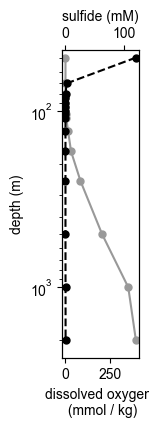

In [16]:
cmap1 = sns.color_palette("Set1")
plt.figure(figsize=(1,4))

#gene = "K05772"
#gene = "K05773"
#gene = "K06857"
#gene = "K03738"

feature = "H2S mM"

plt.plot(df.sort_values("depth_m")[feature],df.sort_values("depth_m")["depth_m"],color=cmap1[8],marker="o",markersize=5)


#sns.scatterplot(y="K11389",data=df,x="depth_m",color="gray")
#sns.lineplot(y="K11389",data=df,x="depth_m",color="gray")

plt.xlabel("dissolved oxygen \n (mmol / kg)")
plt.ylabel("depth (m)")

ax2 = plt.twiny()
feature = "O2_mmolperkg"

plt.plot(df.sort_values("depth_m")[feature],df.sort_values("depth_m")["depth_m"],color="k",marker="o",linestyle="dashed",markersize=5)


#sns.lineplot(y="O2_mmolperkg",data=df,x="depth_m",color="r",ax=ax2)
#sns.scatterplot(y="O2_mmolperkg",data=df,x="depth_m",color="r",ax=ax2)

#plt.ylim([8,2500])
plt.ylim([45,2500])

plt.yscale("log")
#plt.ylabel("dissolved oxygen (mmol / kg)")
plt.xlabel("sulfide (mM)")
plt.ylabel("depth (m)")
plt.gca().invert_yaxis()
#plt.savefig("oxygen_sulfur.03Feb2023.svg")
#plt.savefig("oxygen_sulfur.05Feb2023.svg")


In [20]:
features = ["K05772","K05773","K06857"]
C = df_all[features].values
X = df_all[list(rel_abun)].T.values
df_tup = pd.DataFrame(np.dot(X,C),columns=features,index = list(rel_abun))
df_tup = df_tup.join(df)

Text(0, 0.5, 'depth (m)')

<Figure size 400x300 with 0 Axes>

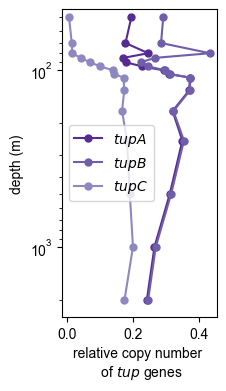

In [24]:
cmap_tup = sns.color_palette("Purples_r")
plt.figure(figsize=(4,3))
plt.figure(figsize=(2,4))

#gene = "K05772"
#gene = "K05773"
#feature = "K06857"
#feature = "K03738"
feature = "K05772"

#sns.scatterplot(x=feature,data=df_tup,y="depth_m",color=cmap_tup[0])
#sns.lineplot(x=feature,data=df,y="depth_m",color=cmap_tup[0])
plt.plot(df_tup.sort_values("depth_m")[feature],df_tup.sort_values("depth_m")["depth_m"],color=cmap_tup[0],marker="o",markersize=5)


feature = "K05773"
#sns.scatterplot(x=feature,data=df,y="depth_m",color=cmap_tup[1])
#sns.lineplot(x=feature,data=df,y="depth_m",color=cmap_tup[1])
plt.plot(df_tup.sort_values("depth_m")[feature],df_tup.sort_values("depth_m")["depth_m"],color=cmap_tup[1],marker="o",markersize=5)

feature = "K06857"
#normalized = df[feature] / df[feature].min()
#sns.scatterplot(x=feature,data=df,y="depth_m",color=cmap_tup[2])
#sns.lineplot(x=feature,data=df,y="depth_m",color=cmap_tup[2])
plt.plot(df_tup.sort_values("depth_m")[feature],df_tup.sort_values("depth_m")["depth_m"],color=cmap_tup[2],marker="o",markersize=5)


#sns.scatterplot(y="K11389",data=df,x="depth_m",color="gray")
#sns.lineplot(y="K11389",data=df,x="depth_m",color="gray")

#plt.ylabel("$aor$ abundance")
plt.xlabel("relative copy number \n of $tup$ genes")
plt.yscale("log")

plt.legend(["$tupA$","$tupB$","$tupC$"])
#plt.savefig("tungstate_transporters.svg")

plt.ylim([45,2500])


plt.gca().invert_yaxis()
plt.yscale("log")
plt.ylabel("depth (m)")
